In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv('D:\\titanic.csv')

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels)

In [9]:
titanic['age_group'].head(4)

0    Young Adult
1          Adult
2    Young Adult
3    Young Adult
Name: age_group, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Young Adult' < 'Adult' < 'Senior']

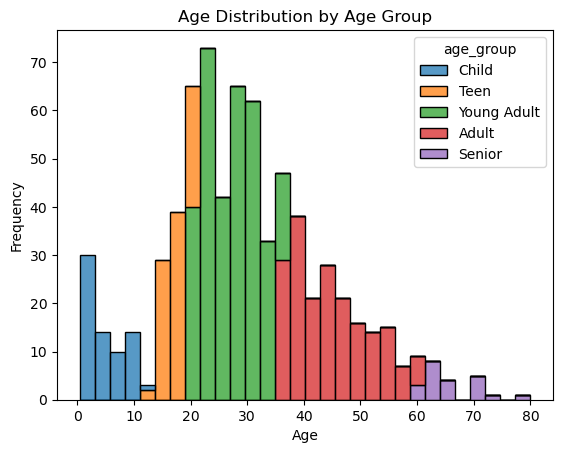

In [18]:
sns.histplot(data=titanic, x="age", hue="age_group", bins=30, kde=False, multiple="stack")
plt.title("Age Distribution by Age Group")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## Age Distribution:

1.Is the distribution of passenger ages skewed (younger vs older)?

2.Does age skewness differ between survivors and non-survivors?

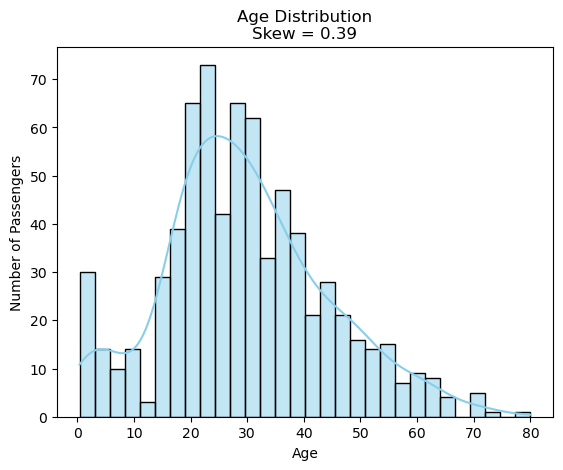

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing ages
ages = titanic["age"].dropna()

# Plot histogram
sns.histplot(ages, bins=30, kde=True, color="skyblue")
plt.title(f"Age Distribution\nSkew = {ages.skew():.2f}")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


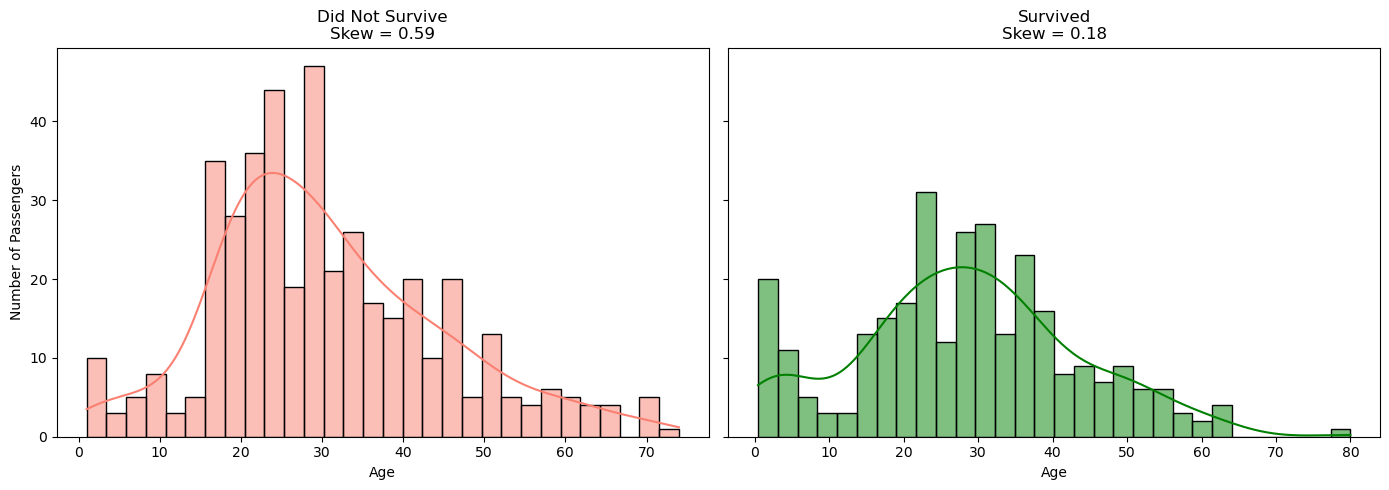

In [22]:
# Split by survival
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, status in zip(axes, [0, 1]):
    subset = titanic[titanic["survived"] == status]["age"].dropna()
    sns.histplot(subset, bins=30, kde=True, ax=ax, color="salmon" if status==0 else "green")
    ax.set_title(f"{'Did Not Survive' if status==0 else 'Survived'}\nSkew = {subset.skew():.2f}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


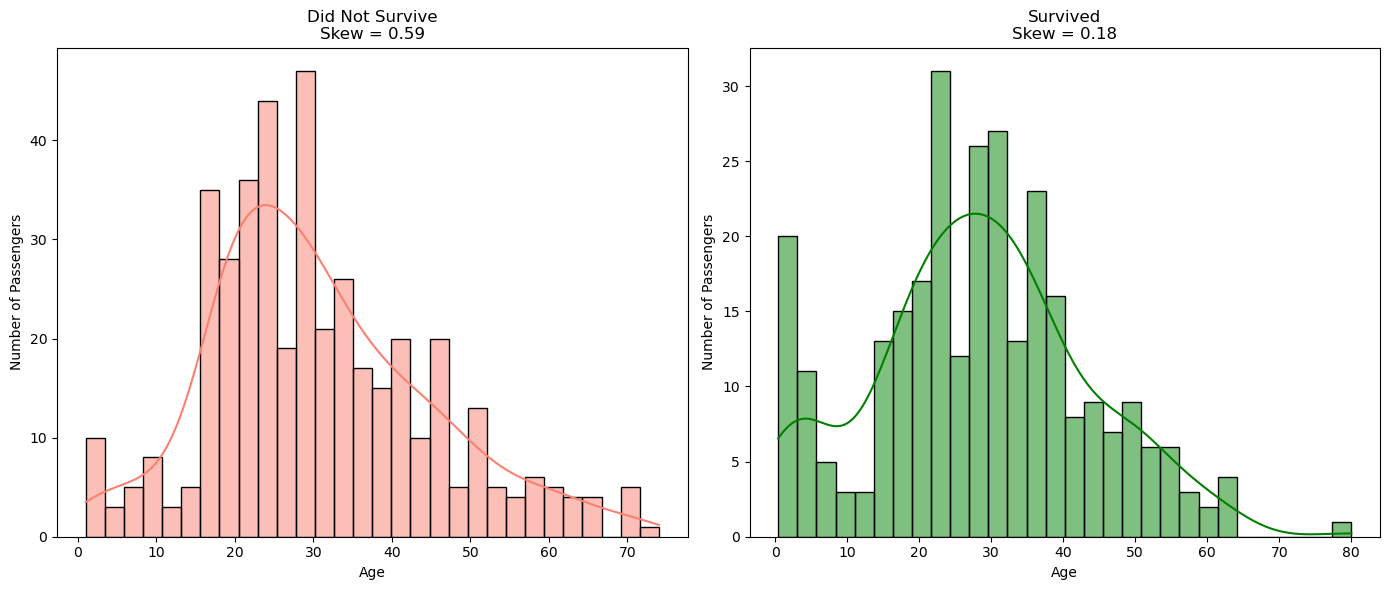

In [26]:

# Remove missing ages
df_age = titanic.dropna(subset=["age"])

# Create two histograms side by side
plt.figure(figsize=(14,6))

# Non-survivors (survived=0)
plt.subplot(1,2,1)
sns.histplot(df_age[df_age["survived"]==0]["age"], bins=30, kde=True, color="salmon")
plt.title(f"Did Not Survive\nSkew = {df_age[df_age['survived']==0]['age'].skew():.2f}")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

# Survivors (survived=1)
plt.subplot(1,2,2)
sns.histplot(df_age[df_age["survived"]==1]["age"], bins=30, kde=True, color="green")
plt.title(f"Survived\nSkew = {df_age[df_age['survived']==1]['age'].skew():.2f}")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

plt.tight_layout()
plt.show()


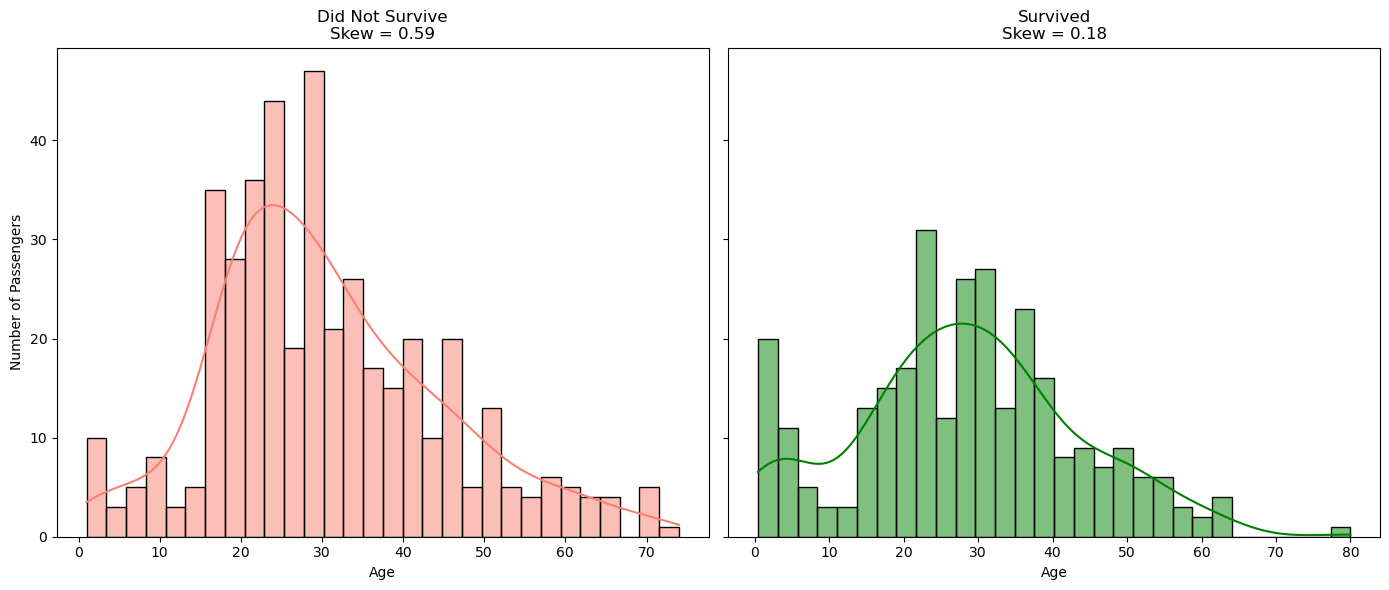

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Non-survivors
sns.histplot(df_age[df_age["survived"]==0]["age"], bins=30, kde=True, color="salmon", ax=ax1)
ax1.set_title(f"Did Not Survive\nSkew = {df_age[df_age['survived']==0]['age'].skew():.2f}")
ax1.set_xlabel("Age")
ax1.set_ylabel("Number of Passengers")

# Survivors
sns.histplot(df_age[df_age["survived"]==1]["age"], bins=30, kde=True, color="green", ax=ax2)
ax2.set_title(f"Survived\nSkew = {df_age[df_age['survived']==1]['age'].skew():.2f}")
ax2.set_xlabel("Age")
ax2.set_ylabel("Number of Passengers")

plt.tight_layout()
plt.show()

C:\Users\ssc\AppData\Local\Temp\ipykernel_9060\3163277669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=titanic, palette="Set2")


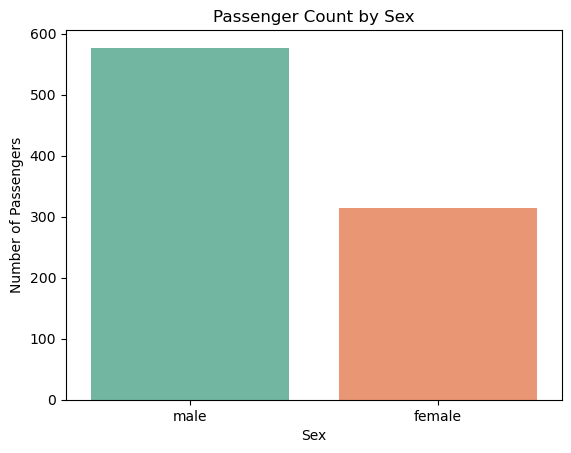

C:\Users\ssc\AppData\Local\Temp\ipykernel_9060\3163277669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=titanic, palette="Set2")


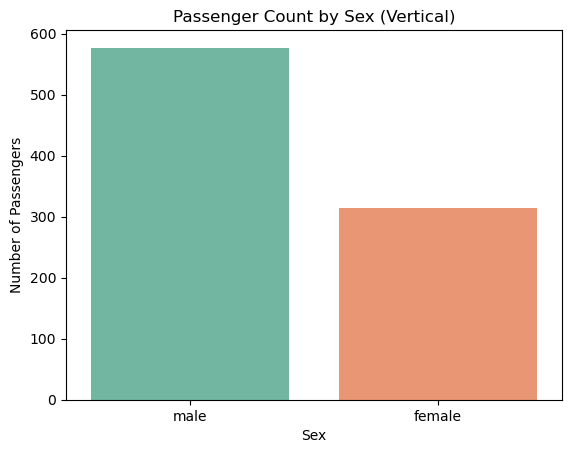

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple bar chart (count by sex)
sns.countplot(x="sex", data=titanic, palette="Set2")
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.show()
sns.countplot(x="sex", data=titanic, palette="Set2")
plt.title("Passenger Count by Sex (Vertical)")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.show()


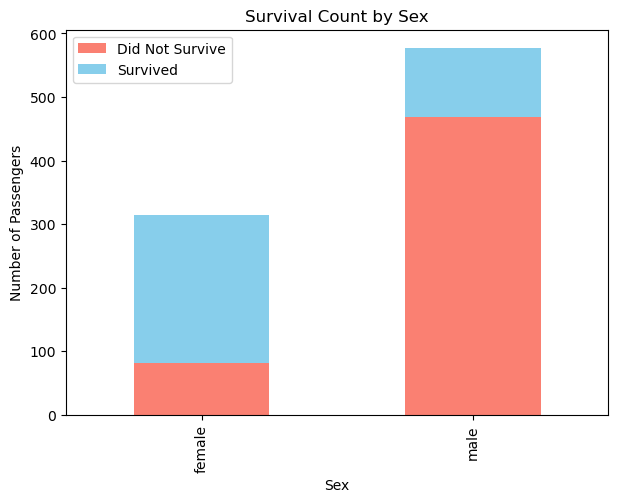

In [33]:
# Create a survival count by sex
survival_by_gender = titanic.groupby(["sex", "survived"]).size().unstack()

# Stacked bar chart
survival_by_gender.plot(kind="bar", stacked=True, figsize=(7,5), color=["salmon","skyblue"])
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(["Did Not Survive","Survived"])
plt.show()


C:\Users\ssc\AppData\Local\Temp\ipykernel_9060\2169787553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pclass", data=titanic, ax=axes[0], palette="Blues")


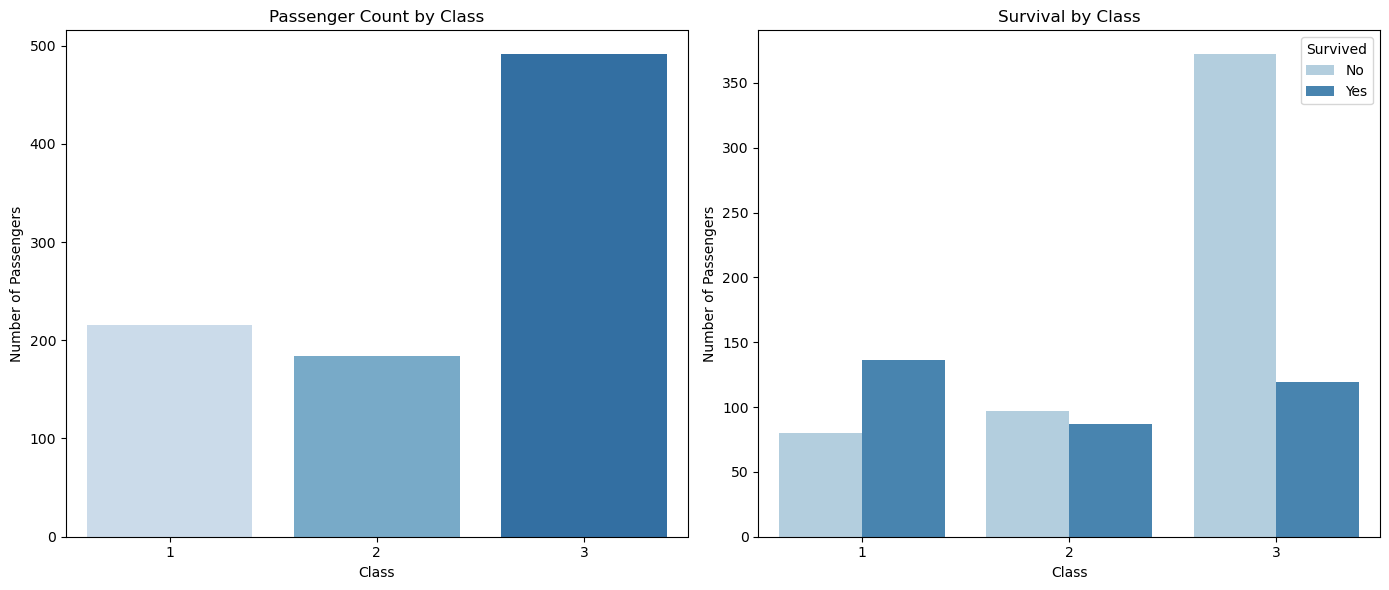

In [41]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

# Left: Passenger count by class
sns.countplot(x="pclass", data=titanic, ax=axes[0], palette="Blues")
axes[0].set_title("Passenger Count by Class")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Number of Passengers")

# Right: Survival count by class
sns.countplot(x="pclass", hue="survived", data=titanic, ax=axes[1], palette="Blues")
axes[1].set_title("Survival by Class")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Number of Passengers")
axes[1].legend(title="Survived", labels=["No","Yes"])

plt.tight_layout()
plt.show()
